## Import Packages

This script makes use of the packages below.  
* 'sqlalchemy' is used to create a connection engine to our Postgres database.
* 'pandas' allows us to query our database using SQL while arraying our data calls into dataframes.
* 'numpy', 'seaborn', and 'matplotlib' are used for visualization purposes.
* 'plotly' used for visualization.



In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import scipy.stats as stats


### Get some data about region

In [2]:
data = pd.read_pickle("listings.pkl")
list(data.columns.values)

data['year_is']
#data['region_id'].sort_values(ascending=True)
region_data = data[['region_name','price_fs']].groupby(['region_name'],as_index=False).agg({'price_fs':['mean','count']})
year_data = data[['year_is','price_fs']].groupby(['year_is'],as_index=False).agg({'price_fs':['mean','count']})

region_data
year_data
#data = data[['year_is','price_fs']].groupby(['region_name'],as_index=False).agg({'price_fs':['mean','count']})
#list(data.columns.values)


year_is      price_fs       
                    mean  count
0     2000   4599.529644    253
1     2001   4790.721408    341
2     2002   4793.863813    514
3     2003   5082.927835    873
4     2004   5510.765936   1004
5     2005   5926.675492   1322
6     2006   6737.760959   1711
7     2007   7387.270428   2570
8     2008   8145.189921   2659
9     2009   9096.882379   2270
10    2010   9977.134110   2662
11    2011  11892.864401   2972
12    2012  13085.382260   4408
13    2013  15139.119403   4489
14    2014  17047.683032   5092
15    2015  17919.019234  13674
16    2016  22614.953961  15878
17    2017  23936.014419   8669
18    2018  26296.076968   3456

In [3]:
region_data

region_name      price_fs       
                                  mean  count
0        Far West Region  17398.950914  10777
1     Great Lakes Region  16821.670230  11038
2         Mideast Region  17202.272649   8124
3          Plains Region  17346.657939   5882
4  Rocky Mountain Region  16769.128686   3730
5       Southeast Region  16909.751026  27047
6       Southwest Region  16771.844020   8219

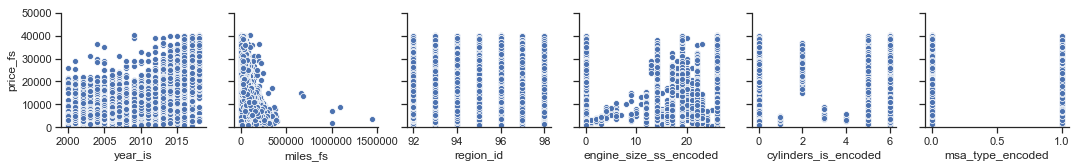

In [94]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

#Get only numerical columns into a DataFrame
numerical_columns = data[['year_is','price_fs','miles_fs','region_id','engine_size_ss_encoded', 'cylinders_is_encoded', 'msa_type_encoded']]

#Make sure the result is a DataFrame and not a DataSeries
type(numerical_columns)
numerical_columns

#plot = sns.pairplot(numerical_columns)
plot = sns.pairplot(numerical_columns, x_vars=['year_is','miles_fs','region_id','engine_size_ss_encoded', 'cylinders_is_encoded', 'msa_type_encoded'], y_vars=['price_fs']);
plot.set(ylim = (0,50000))

#hue_plot = sns.pairplot(numerical_columns)



C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


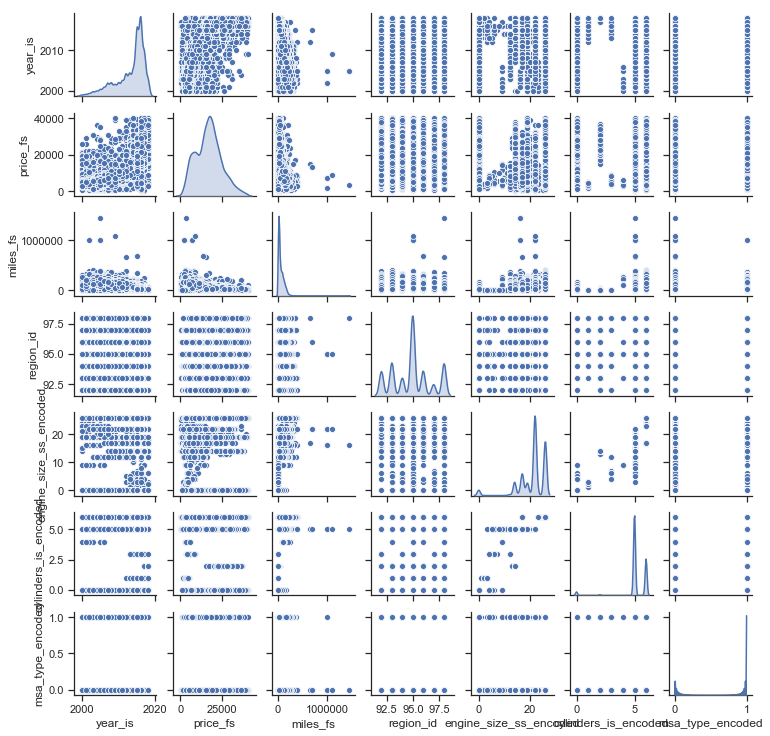

In [95]:
#Show diagonal as Kernel Density Estimator
kde_plot = sns.pairplot(numerical_columns, diag_kind="kde")
#Change the size of the graphs
kde_plot.fig.set_size_inches(10,10)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


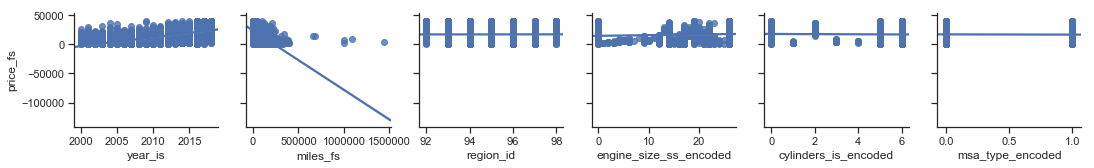

In [107]:
#Show linear relationship if any
linear_plot = sns.pairplot(numerical_columns, x_vars=['year_is','miles_fs','region_id','engine_size_ss_encoded', 'cylinders_is_encoded', 'msa_type_encoded'], y_vars=['price_fs'], kind="reg")
#linear_plot.set(ylim = (0,50000))